#                            Bencana Banjir di Provinsi DKI Jakarta Tahun 2020

Maulana Kavaldo | September 2023

https://maulanakavaldo.github.io

https://linkedin.com/in/maulana-kavaldo

https://www.datascienceportfol.io/maulana_kavaldo

PRESENTASI:
https://gamma.app/docs/Banjir-di-Jakarta-2020-4tz1pw2cmf29gto

TABLEAU PUBLIC:
https://public.tableau.com/app/profile/maulana.kavaldo/viz/DashboardBanjirJakartaTahun2020/DashboardBanjirJakarta?publish=yes

<!-- <p><img alt="Insight logo" src="images/sm-ig.png" align="left" width="25px" height="25px"></p> -->
_______

# Dataset

### Data Kejadian Bencana Banjir di Provinsi DKI Jakarta Tahun 2020
Sumber: https://data.jakarta.go.id/dataset/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020

**Penjelasan mengenai variabel pada dataset ini:**

|No | Kolom                       | Keterangan                                                |
|---|-----------------------------|-----------------------------------------------------------|
|1  | kota_administrasi           | nama kota di Provinsi DKI Jakarta yang terkena dampak banjir |
|2  | kecamatan                   | nama kecamatan yang terkena dampak banjir                    |
|3  | kelurahan                   | nama kelurahan yang terkena dampak banjir                    |
|4  | rw                          | nama RW yang terkena dampak banjir                           |
|5  | jumlah_terdampak_rw         | jumlah RW yang terkena dampak banjir                         |
|6  | jumlah_terdampak_rt         | jumlah RT yang terkena dampak banjir                         |
|7  | jumlah_terdampak_kk         | jumlah kepala keluarga yang terkena dampak banjir            |
|8  | jumlah_terdampak_jiwa       | jumlah orang yang terkena dampak banjir                      |
|9  | ketinggian_air              | ketinggian air pada saat kejadian banjir (cm)                |
|10 | tanggal_kejadian            | tanggal kejadian banjir                                      |
|11 | lama_genangan               | lama genangan saat banjir (hari)                             |
|12 | jumlah_meninggal            | jumlah korban meninggal saat kejadian banjir                 |
|13 | jumlah_hilang               | jumlah korban hilang saat kejadian banjir                    |
|14 | jumlah_luka_berat           | jumlah korban luka berat saat kejadian banjir                |
|15 | jumlah_luka_ringan          | jumlah korban luka ringan saat kejadian banjir               |
|16 | jumlah_pengungsi_tertinggi  | jumlah pengungsi banjir                                      |
|17 | jumlah_tempat_pengungsian   | jumlah tempat pengungsian korban banjir                      |
|18 | nilai_kerugian              | jumlah nilai kerugian akibat kejadian banjir                 |

## Library

In [233]:
import pandas as pd
import re
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Import Data

In [234]:
df_2020_1 = pd.read_csv('dataset_2020/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-januari.csv') 
df_2020_2 = pd.read_csv('dataset_2020/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-februari.csv') 
df_2020_3 = pd.read_csv('dataset_2020/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-maret.csv')
df_2020_4 = pd.read_csv('dataset_2020/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-april.csv') 
df_2020_5 = pd.read_csv('dataset_2020/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-mei.csv') 
df_2020_6 = pd.read_csv('dataset_2020/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-juni.csv') 
df_2020_7 = pd.read_csv('dataset_2020/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-juli.csv') 
df_2020_8 = pd.read_csv('dataset_2020/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-agustus.csv') 
df_2020_9 = pd.read_csv('dataset_2020/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-september.csv') 
df_2020_10 = pd.read_csv('dataset_2020/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-oktober.csv') 
df_2020_11 = pd.read_csv('dataset_2020/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-november.csv') 
df_2020_12 = pd.read_csv('dataset_2020/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-desember.csv') 

In [235]:
# # List nama bulan
# bulan = ['januari', 'februari', 'maret', 'april', 'mei', 'juni', 'juli', 'agustus', 'september', 'oktober', 'november', 'desember']

# # Dictionary untuk menyimpan DataFrames
# dataframes = {}

# # Loop untuk mengimport data
# for i, nama_bulan in enumerate(bulan):
#     file_path = f'dataset_2020/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-{nama_bulan}.csv'
#     df_key = f'df_2020_{i + 1}'
#     dataframes[df_key] = pd.read_csv(file_path)


In [236]:
df_2020_1.head()

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
0,Jakarta Pusat,JOHAR BARU,JOHAR BARU,"RW 01, 02, 06, 08",4,4,35,140,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,140,1,0,0
1,Jakarta Pusat,KEMAYORAN,GUNUNG SAHARI SELATAN,"RW 01, 02, 07, 08",4,4,0,0,10 s/d 70 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0
2,Jakarta Pusat,KEMAYORAN,SERDANG,"RW 01, 02, 06, 07",4,4,0,0,10 s/d 30 cm,tgl. 01 Januari,1,0,0,0,0,0,0,0
3,Jakarta Pusat,SAWAH BESAR,PASAR BARU,"RW 02, 03, 04, 05, 06, 07, 08",7,7,155,625,10 s/d 70 cm,tgl. 01 Januari,0,0,0,0,625,5,0,0
4,Jakarta Pusat,TANAH ABANG,BENDUNGAN HILIR,"RW 07, 09",2,2,52,195,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,195,6,0,0


In [237]:
df_2020_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   kota_administrasi           150 non-null    object
 1   kecamatan                   150 non-null    object
 2   kelurahan                   150 non-null    object
 3   rw                          150 non-null    object
 4   jumlah_terdampak_rw         150 non-null    int64 
 5   jumlah_terdampak_rt         150 non-null    int64 
 6   jumlah_terdampak_kk         150 non-null    int64 
 7   jumlah_terdampak_jiwa       150 non-null    int64 
 8   ketinggian_air              150 non-null    object
 9   tanggal_kejadian            150 non-null    object
 10  lama_genangan               150 non-null    int64 
 11  jumlah_meninggal            150 non-null    int64 
 12  jumlah_hilang               150 non-null    int64 
 13  jumlah_luka_berat           150 non-null    int64 

In [238]:
df_2020_1.describe()

,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.0,150.0,150.0,150.000000,150.000000,150.0,150.0
mean,4.340000,6.693333,147.300000,553.960000,0.086667,0.0,0.0,0.0,481.666667,3.173333,0.0,0.0
std,2.976034,7.268528,240.698696,881.477846,0.305139,0.0,0.0,0.0,764.574380,4.346945,0.0,0.0
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
25%,2.000000,2.000000,4.250000,17.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
50%,4.000000,5.000000,51.000000,192.500000,0.000000,0.0,0.0,0.0,150.000000,2.000000,0.0,0.0
75%,6.000000,7.000000,167.500000,693.750000,0.000000,0.0,0.0,0.0,572.000000,5.000000,0.0,0.0
max,15.000000,38.000000,1140.000000,4560.000000,2.000000,0.0,0.0,0.0,4461.000000,31.000000,0.0,0.0


**Menambahkan kolom tanggal untuk membedakan data banjir setiap bulannya**

In [239]:
# df_2020_1.insert(0, 'tanggal', '2020-01-30') 

for month in range(1, 13):
    if month == 2:
        date_str = f'2020-02-28'  # Untuk bulan Februari
    else:
        month_str = str(month).zfill(2)
        date_str = f'2020-{month_str}-30'
    
    df_name = f'df_2020_{month}'
    df = globals()[df_name]
    df.insert(0, 'tanggal', date_str)

In [240]:
df_2020_1.head()

,tanggal,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
0,2020-01-30,Jakarta Pusat,JOHAR BARU,JOHAR BARU,"RW 01, 02, 06, 08",4,4,35,140,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,140,1,0,0
1,2020-01-30,Jakarta Pusat,KEMAYORAN,GUNUNG SAHARI SELATAN,"RW 01, 02, 07, 08",4,4,0,0,10 s/d 70 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0
2,2020-01-30,Jakarta Pusat,KEMAYORAN,SERDANG,"RW 01, 02, 06, 07",4,4,0,0,10 s/d 30 cm,tgl. 01 Januari,1,0,0,0,0,0,0,0
3,2020-01-30,Jakarta Pusat,SAWAH BESAR,PASAR BARU,"RW 02, 03, 04, 05, 06, 07, 08",7,7,155,625,10 s/d 70 cm,tgl. 01 Januari,0,0,0,0,625,5,0,0
4,2020-01-30,Jakarta Pusat,TANAH ABANG,BENDUNGAN HILIR,"RW 07, 09",2,2,52,195,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,195,6,0,0


In [241]:
df_2020_2.head()

,tanggal,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
0,2020-02-28,Jakarta Pusat,JOHAR BARU,JOHAR BARU,"rw 05, 09,",2,2,0,0,30 s/d 50 cm,"23, 25 februari",0,0,0,0,0,0,0,0
1,2020-02-28,Jakarta Pusat,JOHAR BARU,KAMPUNG RAWA,rw 06,1,2,0,0,20 cm,23 februari,0,0,0,0,0,0,0,0
2,2020-02-28,Jakarta Pusat,JOHAR BARU,TANAH TINGGI,rw 05,1,1,0,0,30 cm,23 februari,0,0,0,0,0,0,0,0
3,2020-02-28,Jakarta Pusat,KEMAYORAN,GUNUNG SAHARI SELATAN,"rw 04, 09,",2,2,0,0,20 s/d 100 cm,"2, 8, 23 februari",0,0,0,0,0,0,0,0
4,2020-02-28,Jakarta Pusat,KEMAYORAN,SERDANG,"rw 06, 01",2,2,0,0,30 cm,23 februari,0,0,0,0,0,0,0,0


In [242]:
df_2020_12.head()

,tanggal,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
0,2020-12-30,Jakarta Barat,KEBON JERUK,KEDOYA UTARA,RW : 002,1,1,0,0,20 cm,2020-12-07,0,0,0,0,0,0,0,0
1,2020-12-30,Jakarta Barat,KEMBANGAN,SRENGSENG,RW : 008,1,1,0,0,25 cm,2020-12-31,0,0,0,0,0,0,0,0
2,2020-12-30,Jakarta Barat,KEMBANGAN,SRENGSENG,0,0,1,0,0,30 cm,2020-12-31,0,0,0,0,0,0,0,0
3,2020-12-30,Jakarta Barat,KEMBANGAN,SRENGSENG,0,0,1,0,0,30 cm,2020-12-31,0,0,0,0,0,0,0,0
4,2020-12-30,Jakarta Selatan,PASAR MINGGU,PEJATEN TIMUR,RW : 005,1,1,25,70,40 cm,2020-12-06,0,0,0,0,0,0,0,0


# MERGE DATA

In [243]:
data_frames = [df_2020_1, df_2020_2, df_2020_3, df_2020_4, df_2020_5, df_2020_6, df_2020_7, df_2020_8, df_2020_9, df_2020_10, df_2020_11, df_2020_12]


merged_df = pd.concat(data_frames, ignore_index=True)

In [244]:
merged_df.head()

,tanggal,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
0,2020-01-30,Jakarta Pusat,JOHAR BARU,JOHAR BARU,"RW 01, 02, 06, 08",4,4,35,140,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,140,1,0,0
1,2020-01-30,Jakarta Pusat,KEMAYORAN,GUNUNG SAHARI SELATAN,"RW 01, 02, 07, 08",4,4,0,0,10 s/d 70 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0
2,2020-01-30,Jakarta Pusat,KEMAYORAN,SERDANG,"RW 01, 02, 06, 07",4,4,0,0,10 s/d 30 cm,tgl. 01 Januari,1,0,0,0,0,0,0,0
3,2020-01-30,Jakarta Pusat,SAWAH BESAR,PASAR BARU,"RW 02, 03, 04, 05, 06, 07, 08",7,7,155,625,10 s/d 70 cm,tgl. 01 Januari,0,0,0,0,625,5,0,0
4,2020-01-30,Jakarta Pusat,TANAH ABANG,BENDUNGAN HILIR,"RW 07, 09",2,2,52,195,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,195,6,0,0


In [245]:
merged_df.tail()

,tanggal,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
1001,2020-12-30,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,10 s/d 15 cm,2020-12-15,0,0,0,0,0,0,0,0
1002,2020-12-30,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,5 s/d 20 cm,2020-12-15,0,0,0,0,0,0,0,0
1003,2020-12-30,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,15 cm,2020-12-15,0,0,0,0,0,0,0,0
1004,2020-12-30,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,RW : 02,1,1,0,0,5 cm,2020-12-15,0,0,0,0,0,0,0,0
1005,2020-12-30,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,5 s/d 20 cm,2020-12-15,0,0,0,0,0,0,0,0


In [246]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tanggal                     1006 non-null   object
 1   kota_administrasi           1006 non-null   object
 2   kecamatan                   1006 non-null   object
 3   kelurahan                   1006 non-null   object
 4   rw                          1006 non-null   object
 5   jumlah_terdampak_rw         1006 non-null   int64 
 6   jumlah_terdampak_rt         1006 non-null   int64 
 7   jumlah_terdampak_kk         1006 non-null   int64 
 8   jumlah_terdampak_jiwa       1006 non-null   int64 
 9   ketinggian_air              1006 non-null   object
 10  tanggal_kejadian            1006 non-null   object
 11  lama_genangan               1006 non-null   int64 
 12  jumlah_meninggal            1006 non-null   int64 
 13  jumlah_hilang               1006 non-null   int6

**Mengubah Format Pada Kolom Tanggal**

In [247]:
merged_df['tanggal'] = pd.to_datetime(merged_df['tanggal'])
# merged_df['tanggal'] = pd.to_datetime(merged_df['tanggal'], errors='coerce')


**Melihat Data Unik Pada Kota Administrasi**

In [248]:
merged_df['kota_administrasi'].unique()

array(['Jakarta Pusat', 'Jakarta Utara', 'Jakarta Barat',
       'Jakarta Selatan', 'Jakarta Timur', 'Kepulauan Seribu',
       'Jakarta Urata'], dtype=object)

**Terdapat kesalahan penulisan nama Kota Administrasi, sehingga dilakukan penggantian nama**

Jakarta Urata = Jakarta Utara

In [249]:
merged_df['kota_administrasi'] = merged_df['kota_administrasi'].replace('Jakarta Urata', 'Jakarta Utara')

In [250]:
merged_df['kota_administrasi'].unique()

array(['Jakarta Pusat', 'Jakarta Utara', 'Jakarta Barat',
       'Jakarta Selatan', 'Jakarta Timur', 'Kepulauan Seribu'],
      dtype=object)

In [251]:
# merged_df.to_csv('merged_data_2020.csv', index=False)

In [252]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tanggal                     1006 non-null   datetime64[ns]
 1   kota_administrasi           1006 non-null   object        
 2   kecamatan                   1006 non-null   object        
 3   kelurahan                   1006 non-null   object        
 4   rw                          1006 non-null   object        
 5   jumlah_terdampak_rw         1006 non-null   int64         
 6   jumlah_terdampak_rt         1006 non-null   int64         
 7   jumlah_terdampak_kk         1006 non-null   int64         
 8   jumlah_terdampak_jiwa       1006 non-null   int64         
 9   ketinggian_air              1006 non-null   object        
 10  tanggal_kejadian            1006 non-null   object        
 11  lama_genangan               1006 non-null   int64       

In [253]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
jumlah_terdampak_rw,1006.0,1.854871,2.352687,0.0,0.0,1.0,2.00,15.0
jumlah_terdampak_rt,1006.0,3.394632,5.357315,1.0,1.0,1.0,3.00,46.0
jumlah_terdampak_kk,1006.0,42.152087,197.782120,0.0,0.0,0.0,6.00,3762.0
jumlah_terdampak_jiwa,1006.0,150.362823,680.570810,0.0,0.0,0.0,20.75,13450.0
lama_genangan,1006.0,0.018887,0.150095,0.0,0.0,0.0,0.00,2.0
jumlah_meninggal,1006.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
jumlah_hilang,1006.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
jumlah_luka_berat,1006.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
jumlah_luka_ringan,1006.0,89.715706,359.003816,0.0,0.0,0.0,0.00,4461.0
jumlah_pengungsi_tertinggi,1006.0,1.324056,10.636292,0.0,0.0,0.0,0.00,271.0


**Data duplikat**

In [254]:
duplicate_rows = merged_df[merged_df.duplicated()]
jumlah_data_duplikat = len(duplicate_rows)

print("Jumlah data duplikat:", jumlah_data_duplikat)

Jumlah data duplikat: 84


In [255]:
merged_df[merged_df.duplicated()]

,tanggal,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
521,2020-10-30,Jakarta Barat,KEBON JERUK,KEDOYA UTARA,0,0,1,0,0,10 s/d 60 cm,"09,10,11 Oktober",0,0,0,0,0,0,0,0
532,2020-10-30,Jakarta Barat,KEBON JERUK,DURI KEPA,0,0,1,0,0,30 cm,16 Oktober,0,0,0,0,0,0,0,0
546,2020-10-30,Jakarta Barat,KEMBANGAN,KEMBANGAN SELATAN,0,0,1,0,0,90 cm,11 Oktober,0,0,0,0,0,0,0,0
554,2020-10-30,Jakarta Barat,CENGKARENG,KEDAUNG KALI ANGKE,0,0,1,0,0,20 cm s/d 50 cm,"10,11 Oktober",0,0,0,0,0,0,0,0
559,2020-10-30,Jakarta Barat,CENGKARENG,DURI KOSAMBI,0,0,1,0,0,25 cm,"10,11 Oktober",0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,2020-12-30,Jakarta Timur,JATINEGARA,BIDARA CINA,0,0,1,0,0,10 s/d 60 cm,2020-12-06,0,0,0,0,0,0,0,0
991,2020-12-30,Jakarta Timur,JATINEGARA,BIDARA CINA,0,0,1,0,0,10 s/d 60 cm,2020-12-06,0,0,0,0,0,0,0,0
992,2020-12-30,Jakarta Timur,JATINEGARA,BIDARA CINA,0,0,1,0,0,10 s/d 60 cm,2020-12-06,0,0,0,0,0,0,0,0
996,2020-12-30,Jakarta Timur,KRAMAT JATI,CAWANG,0,0,1,0,0,60 cm,2020-12-06,0,0,0,0,0,0,0,0


In [256]:
merged_df.drop_duplicates(inplace=True)

In [257]:
merged_df.shape

(922, 19)

**Membuat kolom baru untuk mendapatkan nilai rata-rata ketinggian air**

In [258]:
def extract_mean(entry):
    values = [int(val) for val in re.findall(r'\d+', entry)]
    return sum(values) / len(values)

merged_df['ketinggian_air_num'] = merged_df['ketinggian_air'].apply(extract_mean)

In [259]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 922 entries, 0 to 1004
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tanggal                     922 non-null    datetime64[ns]
 1   kota_administrasi           922 non-null    object        
 2   kecamatan                   922 non-null    object        
 3   kelurahan                   922 non-null    object        
 4   rw                          922 non-null    object        
 5   jumlah_terdampak_rw         922 non-null    int64         
 6   jumlah_terdampak_rt         922 non-null    int64         
 7   jumlah_terdampak_kk         922 non-null    int64         
 8   jumlah_terdampak_jiwa       922 non-null    int64         
 9   ketinggian_air              922 non-null    object        
 10  tanggal_kejadian            922 non-null    object        
 11  lama_genangan               922 non-null    int64        

In [260]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
jumlah_terdampak_rw,922.0,2.023861,2.386961,0.0,1.0,1.0,2.75,15.0
jumlah_terdampak_rt,922.0,3.612798,5.545074,1.0,1.0,1.0,4.00,46.0
jumlah_terdampak_kk,922.0,45.992408,206.176366,0.0,0.0,0.0,7.75,3762.0
jumlah_terdampak_jiwa,922.0,164.061822,709.345351,0.0,0.0,0.0,26.50,13450.0
lama_genangan,922.0,0.020607,0.156677,0.0,0.0,0.0,0.00,2.0
jumlah_meninggal,922.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
jumlah_hilang,922.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
jumlah_luka_berat,922.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
jumlah_luka_ringan,922.0,97.889371,373.948693,0.0,0.0,0.0,0.00,4461.0
jumlah_pengungsi_tertinggi,922.0,1.444685,11.102898,0.0,0.0,0.0,0.00,271.0


In [261]:
merged_df.describe(include=['object'])

,kota_administrasi,kecamatan,kelurahan,rw,ketinggian_air,tanggal_kejadian
count,922,922,922,922,922,922
unique,6,47,220,356,183,237
top,Jakarta Timur,JATINEGARA,KAMPUNG MELAYU,0,20 cm,tgl. 01 Januari
freq,343,84,57,186,64,104


Analisis Deskriptif:

1. Jumlah Terdampak RW:
    - Rata-rata jumlah terdampak RW adalah sekitar 2.02, dengan nilai minimum 0 dan maksimum 15.
    - Kuartil pertama (25%) adalah 1, median (50%) adalah 1, dan kuartil ketiga (75%) adalah 2.75.

2. Jumlah Terdampak RT:
    - Rata-rata jumlah terdampak RT adalah sekitar 3.61, dengan nilai minimum 1 dan maksimum 46.
    - Kuartil pertama (25%) adalah 1, median (50%) adalah 1, dan kuartil ketiga (75%) adalah 4.

3. Jumlah Terdampak KK:
    - Rata-rata jumlah terdampak KK adalah sekitar 45.99, dengan nilai minimum 0 dan maksimum 3762.
    - Kuartil pertama (25%) adalah 0, median (50%) adalah 0, dan kuartil ketiga (75%) adalah 7.75.

4. Jumlah Terdampak Jiwa:
    - Rata-rata jumlah terdampak jiwa adalah sekitar 164.06, dengan nilai minimum 0 dan maksimum 13450.
    - Kuartil pertama (25%) adalah 0, median (50%) adalah 0, dan kuartil ketiga (75%) adalah 26.50.

5. Lama Genangan:
    - Rata-rata lama genangan adalah sekitar 0.02, dengan nilai minimum 0 dan maksimum 2.0.
    - Sebagian besar data memiliki nilai nol, dengan kuartil pertama, median, dan kuartil ketiga semuanya adalah 0.

6. Jumlah Meninggal, Hilang Luka Berat, dan nilai kerugian:
    - Rata-ratanya adalah 0, dengan semua data memiliki nilai 0.
    - Untuk semua variabel ini, rata-rata dan deviasi standar adalah 0, yang mengindikasikan bahwa mayoritas observasi memiliki nilai 0. Hal ini dapat menunjukkan bahwa kebanyakan data adalah nol dan mungkin ada banyak kasus di mana tidak ada kejadian yang tercatat.

7. Jumlah Luka Ringan:
    - Rata-rata jumlah luka ringan adalah sekitar 97.89, dengan nilai minimum 0 dan maksimum 4461.
    - Sebagian besar data memiliki nilai nol, dengan kuartil pertama, median, dan kuartil ketiga semuanya adalah 0.

8. Jumlah Pengungsi Tertinggi:
    - Rata-rata jumlah pengungsi tertinggi adalah sekitar 1.44, dengan nilai minimum 0 dan maksimum 271.
    - Sebagian besar data memiliki nilai nol, dengan kuartil pertama, median, dan kuartil ketiga semuanya adalah 0.

9. Jumlah Tempat Pengungsian:
    - Jumlah maksimum tempat pengungsian adalah 3.
    - Sebagian besar data memiliki nilai nol, dengan kuartil pertama, median, dan kuartil ketiga semuanya adalah 0.

10. Ketinggian Air (dalam numerik):
    - Rata-rata ketinggian air adalah sekitar 42.06, dengan nilai minimum 5 dan maksimum 200.
    - Kuartil pertama (25%) adalah 20, median (50%) adalah 35, dan kuartil ketiga (75%) adalah 50.50.


Jumlah Unik (unique):
- Kota Administrasi: Terdapat 6 kota administrasi yang berbeda dalam dataset.
- Kecamatan: Ada 47 kecamatan yang berbeda.
- Kelurahan: Terdapat 220 kelurahan yang berbeda.
- RW (Rukun Warga): Terdapat 356 nilai yang berbeda.
- Ketinggian Air: Ada 183 tingkat ketinggian air yang berbeda.
- Tanggal Kejadian: Terdapat 237 tanggal kejadian yang berbeda.

Nilai Paling Sering Muncul (top):
- Kota Administrasi yang paling sering muncul adalah "Jakarta Timur".
- Kecamatan yang paling sering muncul adalah "JATINEGARA".
- Kelurahan yang paling sering muncul adalah "KAMPUNG MELAYU".
- RW dengan nilai yang paling sering adalah "0", data kosong.
- Ketinggian Air yang paling sering adalah "20 cm".
- Tanggal Kejadian yang paling sering adalah "tgl. 01 Januari".

Frekuensi Nilai Teratas (freq):
- "Jakarta Timur" muncul sebanyak 343 kali dalam kolom "kota_administrasi".
- "JATINEGARA" muncul sebanyak 84 kali dalam kolom "kecamatan".
- "KAMPUNG MELAYU" muncul sebanyak 57 kali dalam kolom "kelurahan".
- "0" muncul sebanyak 186 kali dalam kolom "rw".
- "20 cm" muncul sebanyak 64 kali dalam kolom "ketinggian_air".
- "tgl. 01 Januari" muncul sebanyak 104 kali dalam kolom "tanggal_kejadian".

Analisis Inferensial:

1. Jumlah terdampak pada tingkat RW dan RT memiliki variasi yang cukup besar, dengan beberapa lokasi memiliki jumlah terdampak yang signifikan.

2. Jumlah terdampak KK dan jiwa juga memiliki variasi yang besar.

3. Rata-rata lama genangan sangat rendah, dengan sebagian besar lokasi memiliki nilai nol. Ini menunjukkan bahwa genangan air tidak berlangsung lama di sebagian besar tempat.

4. Jumlah korban meninggal, hilang, luka berat, dan nilai kerugian semuanya memiliki nilai nol pada sebagian besar lokasi, menunjukkan bahwa beberapa lokasi mungkin tidak mengalami dampak yang signifikan.

5. Ketinggian air rata-rata adalah sekitar 42.06, tetapi nilai minimumnya adalah 5, yang berarti beberapa lokasi mungkin mengalami banjir yang lebih parah.

6. Jumlah luka ringan memiliki nilai rata-rata yang signifikan (97.8) dengan deviasi standar yang cukup besar.


In [262]:
# merged_df.to_csv('merged_data_2020.csv', index=False)

In [263]:
# merged_df = merged_df[['tanggal', 'kota_administrasi', 'kecamatan', 'kelurahan', 'rw', 'ketinggian_air', 'tanggal_kejadian',                    
#                        'jumlah_terdampak_kk', 'jumlah_terdampak_rw', 'jumlah_terdampak_rt', 'jumlah_terdampak_jiwa', 'lama_genangan',
#                        'jumlah_luka_ringan', 'jumlah_pengungsi_tertinggi', 'jumlah_tempat_pengungsian']]


In [264]:
merged_df.head()

,tanggal,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,ketinggian_air_num
0,2020-01-30,Jakarta Pusat,JOHAR BARU,JOHAR BARU,"RW 01, 02, 06, 08",4,4,35,140,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,140,1,0,0,20.0
1,2020-01-30,Jakarta Pusat,KEMAYORAN,GUNUNG SAHARI SELATAN,"RW 01, 02, 07, 08",4,4,0,0,10 s/d 70 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0,40.0
2,2020-01-30,Jakarta Pusat,KEMAYORAN,SERDANG,"RW 01, 02, 06, 07",4,4,0,0,10 s/d 30 cm,tgl. 01 Januari,1,0,0,0,0,0,0,0,20.0
3,2020-01-30,Jakarta Pusat,SAWAH BESAR,PASAR BARU,"RW 02, 03, 04, 05, 06, 07, 08",7,7,155,625,10 s/d 70 cm,tgl. 01 Januari,0,0,0,0,625,5,0,0,40.0
4,2020-01-30,Jakarta Pusat,TANAH ABANG,BENDUNGAN HILIR,"RW 07, 09",2,2,52,195,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,195,6,0,0,50.5


In [265]:
merged_df[['ketinggian_air','ketinggian_air_num']]

,ketinggian_air,ketinggian_air_num
0,10 s/d 30 cm,20.0
1,10 s/d 70 cm,40.0
2,10 s/d 30 cm,20.0
3,10 s/d 70 cm,40.0
4,31 s/d 70 cm,50.5
...,...,...
1000,5 s/d 10 cm,7.5
1001,10 s/d 15 cm,12.5
1002,5 s/d 20 cm,12.5
1003,15 cm,15.0


In [266]:
# merged_df.to_csv('merged_data_2020.csv', index=False)

In [267]:
merged_damage = merged_df.groupby('kota_administrasi')[['jumlah_terdampak_jiwa','jumlah_luka_ringan', 'jumlah_pengungsi_tertinggi']].sum().reset_index()
merged_damage

,kota_administrasi,jumlah_terdampak_jiwa,jumlah_luka_ringan,jumlah_pengungsi_tertinggi
0,Jakarta Barat,20309,21109,192
1,Jakarta Pusat,3038,5381,32
2,Jakarta Selatan,25614,22214,712
3,Jakarta Timur,94387,33519,302
4,Jakarta Utara,7917,8031,94
5,Kepulauan Seribu,0,0,0


**Bagaimana distribusi ketinggian air di berbagai Kota Administrasi?**

In [268]:
kota_data = merged_df.groupby('kota_administrasi')['ketinggian_air_num'].mean().reset_index()
kota_data = kota_data.sort_values(by='ketinggian_air_num', ascending=False)

fig = px.bar(kota_data, x='kota_administrasi', y='ketinggian_air_num', title='Distribusi Ketinggian Air per Kota Administrasi')
fig.update_xaxes(title_text='Kota Administrasi')
fig.update_yaxes(title_text='Ketinggian Air (cm)')
fig.update_layout(template='plotly_dark')
fig.show()

**Bagaimana distribusi ketinggian air di berbagai kelurahan?**

In [269]:
kelurahan_data = merged_df.groupby('kelurahan')['ketinggian_air_num'].mean().reset_index()

# Urutkan data
kelurahan_data = kelurahan_data.sort_values(by='ketinggian_air_num', ascending=False)

# Buat plot
fig = px.bar(kelurahan_data, x='kelurahan', y='ketinggian_air_num', title='Distribusi Ketinggian Air per Kelurahan')
fig.update_xaxes(title_text='Kelurahan')
fig.update_yaxes(title_text='Ketinggian Air (cm)')
fig.update_layout(template='plotly_dark')
fig.show()

**Berapa lama genangan air biasanya berlangsung?**

In [270]:
# rata-rata lama genangan air
rata_rata_lama_genangan = merged_df['lama_genangan'].mean()

print(f'Rata-rata lama genangan air: {rata_rata_lama_genangan} hari')


Rata-rata lama genangan air: 0.020607375271149676 hari


In [271]:
rata_rata_lama_genangan_kelurahan = merged_df.groupby('kelurahan')['lama_genangan'].mean().reset_index()
rata_rata_lama_genangan_kelurahan = rata_rata_lama_genangan_kelurahan.sort_values(by='lama_genangan', ascending=False)

print(rata_rata_lama_genangan_kelurahan)

                kelurahan  lama_genangan
202                TANGKI       1.000000
149            PETAMBURAN       0.750000
19       CENGKARENG TIMUR       0.500000
189               SERDANG       0.500000
186               SEMANAN       0.333333
..                    ...            ...
81   KEBAYORAN LAMA UTARA       0.000000
82             KEBON BARU       0.000000
83           KEBON BAWANG       0.000000
84            KEBON JERUK       0.000000
219         WIJAYA KUSUMA       0.000000

[220 rows x 2 columns]


In [272]:
fig = px.bar(rata_rata_lama_genangan_kelurahan, x='kelurahan', y='lama_genangan', title='Rata-rata Lama Genangan Air berdasarkan Kelurahan')
fig.update_xaxes(title_text='Kelurahan')
fig.update_yaxes(title_text='Rata-rata Lama Genangan (hari)')

fig.update_layout(template='plotly_dark')
fig.show()

In [273]:
rata_rata_lama_genangan_kecamatan = merged_df.groupby('kecamatan')['lama_genangan'].mean().reset_index()
rata_rata_lama_genangan_kecamatan = rata_rata_lama_genangan_kecamatan.sort_values(by='lama_genangan', ascending=False)

print(rata_rata_lama_genangan_kecamatan)

                   kecamatan  lama_genangan
44               TANAH ABANG       0.333333
42                TAMAN SARI       0.333333
19                 KEMAYORAN       0.125000
2                 CENGKARENG       0.076923
5                  CILINCING       0.066667
32                  PANCORAN       0.064516
31                  PALMERAH       0.062500
25                   MAKASAR       0.051282
8                DUREN SAWIT       0.045455
14                 KALIDERES       0.041667
46                     TEBET       0.040000
24               KRAMAT JATI       0.027027
34                PASAR REBO       0.000000
29                   MENTENG       0.000000
30                PADEMANGAN       0.000000
33              PASAR MINGGU       0.000000
37               PULO GADUNG       0.000000
35               PENJARINGAN       0.000000
36              PESANGGRAHAN       0.000000
27          MAMPANG PRAPATAN       0.000000
38                PULOGADUNG       0.000000
39               SAWAH BESAR    

In [274]:
fig = px.bar(rata_rata_lama_genangan_kecamatan, x='kecamatan', y='lama_genangan', title='Rata-rata Lama Genangan Air berdasarkan Kelurahan')
fig.update_xaxes(title_text='Kecamatan')
fig.update_yaxes(title_text='Rata-rata Lama Genangan (hari)')
fig.update_layout(template='plotly_dark')

**Berapa banyak tempat pengungsian yang tersedia untuk masyarakat terdampak?**

In [275]:
total_tempat_pengungsian = merged_df['jumlah_tempat_pengungsian'].sum()

print("Total tempat pengungsian yang tersedia untuk masyarakat terdampak:", total_tempat_pengungsian)

Total tempat pengungsian yang tersedia untuk masyarakat terdampak: 12


In [276]:
tempat_pengungsian_per_kelurahan = merged_df.groupby('kelurahan')['jumlah_tempat_pengungsian'].sum().reset_index()
tempat_pengungsian_per_kelurahan = tempat_pengungsian_per_kelurahan.sort_values(by='jumlah_tempat_pengungsian', ascending=False)

print(tempat_pengungsian_per_kelurahan)

                  kelurahan  jumlah_tempat_pengungsian
21                 CIGANJUR                          3
176                RAMBUTAN                          3
25           CILANDAK TIMUR                          2
8               BIDARA CINA                          1
162           PONDOK PINANG                          1
..                      ...                        ...
78               KAYU PUTIH                          0
79                KEBAGUSAN                          0
80   KEBAYORAN LAMA SELATAN                          0
81     KEBAYORAN LAMA UTARA                          0
219           WIJAYA KUSUMA                          0

[220 rows x 2 columns]


In [277]:
fig = px.bar(tempat_pengungsian_per_kelurahan, x='kelurahan', y='jumlah_tempat_pengungsian', title='Jumlah Tempat Pengungsian per Kelurahan',
             labels={'kelurahan': 'Kelurahan', 'jumlah_tempat_pengungsian': 'Jumlah Tempat Pengungsian'})

fig.update_layout(template='plotly_dark')
fig.show()

**Apa jumlah luka ringan dan pengungsi tertinggi yang terkait dengan kejadian ini?**

In [278]:
# Jumlah luka ringan dan pengungsi tertinggi
total_luka_ringan = merged_df['jumlah_luka_ringan'].sum()
total_pengungsi_tertinggi = merged_df['jumlah_pengungsi_tertinggi'].max()

print("Jumlah luka ringan terkait dengan kejadian banjir:", total_luka_ringan)
print("Jumlah pengungsi tertinggi terkait dengan kejadian banjir:", total_pengungsi_tertinggi)

Jumlah luka ringan terkait dengan kejadian banjir: 90254
Jumlah pengungsi tertinggi terkait dengan kejadian banjir: 271


**Kesimpulan:**

1. Jumlah luka ringan terkait dengan kejadian banjir adalah sebanyak 90.254 kasus. Ini menunjukkan bahwa banjir tersebut memiliki dampak signifikan terhadap kesehatan penduduk, dengan banyak orang mengalami luka ringan sebagai akibat dari banjir.

2. Jumlah pengungsi tertinggi terkait dengan kejadian banjir adalah sebanyak 271 orang. Ini menunjukkan bahwa banjir tersebut juga menyebabkan banyak orang harus mengungsi dari tempat tinggal mereka karena genangan air yang tinggi.

Kesimpulannya, banjir ini memiliki dampak serius baik dari segi kesehatan maupun pemindahan penduduk, dan tindakan darurat mungkin diperlukan untuk membantu mereka yang terkena dampak banjir ini.

# REGRESI

In [280]:
X = merged_df[['ketinggian_air_num']]
y = merged_df['jumlah_terdampak_jiwa']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membuat dan melatih model regresi linear
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# prediksi
y_pred = model.predict(X_test_scaled)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

fig = px.scatter(merged_df, x='ketinggian_air_num', y='jumlah_terdampak_jiwa', title='Regresi Linear dengan MinMaxScaler')
fig.add_trace(px.line(x=X_test.squeeze(), y=y_pred).data[0])
fig.update_layout(template='plotly_dark')
fig.show()

Mean Squared Error: 1043579.1221216298
R-squared: 0.032108401616201876


////////////////////////////////

In [281]:
X = merged_df[['ketinggian_air_num']]
y = merged_df['jumlah_terdampak_jiwa']

# Inisialisasi model regresi linear
model = LinearRegression()

# Latih model
model.fit(X, y)

# Prediksi nilai y berdasarkan model
y_pred = model.predict(X)

# Buat plot regresi menggunakan Plotly
fig = px.scatter(merged_df, x='ketinggian_air_num', y='jumlah_terdampak_jiwa', title='Grafik Regresi Linear')

# Tambahkan garis regresi linear ke plot
fig.add_trace(go.Scatter(x=merged_df['ketinggian_air_num'], y=y_pred, mode='lines', name='Regresi Linear'))

# Tampilkan plot
fig.update_layout(template='plotly_dark')
fig.show()

# ---------------------
r_squared = r2_score(y, y_pred)
print("R-squared:", r_squared)

# Cetak koefisien regresi
print("Koefisien Regresi:", model.coef_[0])

R-squared: 0.06460867540823212
Koefisien Regresi: 6.50474597876755


Model belum cukup baik dalam menjelaskan hubungan antara variabel yang digunakan dalam analisis.

# CLUSTERING

In [282]:
features = ['ketinggian_air_num', 'jumlah_terdampak_jiwa', 'lama_genangan']
X = merged_df[features]

# jumlah klaster
n_clusters = 3

# Membuat model K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)

# # Standarisasi data
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(data)

# Melakukan klastering
clusters = kmeans.fit_predict(X)

merged_df['cluster'] = clusters

fig = px.scatter(merged_df, x='ketinggian_air_num', y='jumlah_terdampak_jiwa', color='cluster',
                 title='Clustering')


fig.update_layout(template='plotly_dark')
fig.show()

print(merged_df[['kota_administrasi', 'cluster']])


     kota_administrasi  cluster
0        Jakarta Pusat        0
1        Jakarta Pusat        0
2        Jakarta Pusat        0
3        Jakarta Pusat        0
4        Jakarta Pusat        0
...                ...      ...
1000  Kepulauan Seribu        0
1001  Kepulauan Seribu        0
1002  Kepulauan Seribu        0
1003  Kepulauan Seribu        0
1004  Kepulauan Seribu        0

[922 rows x 2 columns]


In [ ]:
fig = px.scatter(merged_df, x='ketinggian_air_num', y='lama_genangan', color='cluster',
                 title='Clustering')


fig.update_layout(template='plotly_dark')
fig.show()

In [283]:
# Pilih fitur yang akan digunakan untuk klustering
features = ['ketinggian_air_num', 'jumlah_terdampak_kk', 'lama_genangan']

# Normalisasi data jika diperlukan
# data[features] = (data[features] - data[features].mean()) / data[features].std()

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
merged_df['cluster'] = kmeans.fit_predict(merged_df[features])

# Buat scatter plot 
fig = px.scatter(merged_df, x='ketinggian_air_num', y='jumlah_terdampak_kk', color='cluster', 
                 title='Kluster')

fig.update_layout(template='plotly_dark')

fig.show()

In [284]:
merged_df[['kota_administrasi', 'cluster']]

,kota_administrasi,cluster
0,Jakarta Pusat,0
1,Jakarta Pusat,0
2,Jakarta Pusat,0
3,Jakarta Pusat,0
4,Jakarta Pusat,0
...,...,...
1000,Kepulauan Seribu,0
1001,Kepulauan Seribu,0
1002,Kepulauan Seribu,0
1003,Kepulauan Seribu,0


**Clustering Kota Administrasi**

In [285]:
kota_cluster = merged_df.groupby('kota_administrasi')[['ketinggian_air_num', 'jumlah_terdampak_jiwa', 'lama_genangan']].mean()
kota_cluster

,ketinggian_air_num,jumlah_terdampak_jiwa,lama_genangan
kota_administrasi,,,
Jakarta Barat,37.000000,113.458101,0.033520
Jakarta Pusat,34.081081,82.108108,0.108108
Jakarta Selatan,46.118705,92.136691,0.010791
Jakarta Timur,45.540816,275.180758,0.014577
Jakarta Utara,30.445205,108.452055,0.013699
Kepulauan Seribu,18.958333,0.000000,0.000000


In [286]:
features = ['ketinggian_air_num', 'jumlah_terdampak_jiwa', 'lama_genangan']
X = kota_cluster[features]

# Normalisasi data 
# kota_cluster[features] = (kota_cluster[features] - kota_cluster[features].mean()) / kota_cluster[features].std()

# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)


# # Menentukan jumlah kluster yang optimal menggunakan metode Elbow
# inertia = []
# for i in range(1, len(kota_cluster_scaler) + 1):  # Use the number of samples as the upper limit
#     kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
#     kmeans.fit(X_scaled)
#     inertia.append(kmeans.inertia_)

# # Plot grafik Elbow
# plt.figure(figsize=(8, 6))
# plt.plot(range(1, len(kota_cluster_scaler) + 1), inertia, marker='o', linestyle='--')
# plt.title('Metode Elbow untuk Menentukan Jumlah Kluster')
# plt.xlabel('Jumlah Kluster')
# plt.ylabel('Inertia')
# plt.grid()
# plt.show()


# jumlah kluster
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kota_cluster['cluster'] = kmeans.fit_predict(X)

# Buat scatter plot
fig = px.scatter(kota_cluster, x='ketinggian_air_num', y='jumlah_terdampak_jiwa', color='cluster', 
                 title='Kluster Kota Administrasi')

fig.update_layout(template='plotly_dark')

fig.show()

In [287]:
kota_cluster

,ketinggian_air_num,jumlah_terdampak_jiwa,lama_genangan,cluster
kota_administrasi,,,,
Jakarta Barat,37.000000,113.458101,0.033520,1
Jakarta Pusat,34.081081,82.108108,0.108108,1
Jakarta Selatan,46.118705,92.136691,0.010791,1
Jakarta Timur,45.540816,275.180758,0.014577,0
Jakarta Utara,30.445205,108.452055,0.013699,1
Kepulauan Seribu,18.958333,0.000000,0.000000,2


In [288]:
mapping = {0: 'tinggi', 1: 'sedang', 2: 'rendah'}

kota_cluster['cluster'] = kota_cluster['cluster'].replace(mapping)

In [289]:
kota_cluster.sort_values(by='cluster', ascending=True)

,ketinggian_air_num,jumlah_terdampak_jiwa,lama_genangan,cluster
kota_administrasi,,,,
Kepulauan Seribu,18.958333,0.000000,0.000000,rendah
Jakarta Barat,37.000000,113.458101,0.033520,sedang
Jakarta Pusat,34.081081,82.108108,0.108108,sedang
Jakarta Selatan,46.118705,92.136691,0.010791,sedang
Jakarta Utara,30.445205,108.452055,0.013699,sedang
Jakarta Timur,45.540816,275.180758,0.014577,tinggi


# INDEXING

In [290]:
# Pilih variabel yang akan digunakan untuk membuat indeks (misalnya jumlah_terdampak_jiwa, nilai_kerugian, dan jumlah_tempat_pengungsian)
merged_df['indeks_dampak_banjir'] = (merged_df['jumlah_terdampak_jiwa'] + merged_df['jumlah_luka_ringan']) / 2

wilayah_terdampak = merged_df.sort_values(by='indeks_dampak_banjir', ascending=False)

# wilayah-wilayah yang paling terdampak
print("Wilayah yang Paling Terdampak oleh Banjir:")
print(wilayah_terdampak[['kota_administrasi', 'kecamatan', 'kelurahan', 'indeks_dampak_banjir']].head())


Wilayah yang Paling Terdampak oleh Banjir:
    kota_administrasi   kecamatan           kelurahan  indeks_dampak_banjir
299     Jakarta Timur     MAKASAR     CIPINANG MELAYU                7937.0
312     Jakarta Timur  PULOGADUNG          KAYU PUTIH                4539.0
25      Jakarta Barat  CENGKARENG               KAPUK                4461.0
83    Jakarta Selatan    PANCORAN            KALIBATA                3615.0
26      Jakarta Barat  CENGKARENG  KEDAUNG KALI ANGKE                2804.0


https://www.tribunnews.com/metropolitan/2020/01/01/titik-banjir-terbanyak-di-jakarta-timur-warga-sebut-ini-banjir-terparah-selama-7-tahun-terakhir

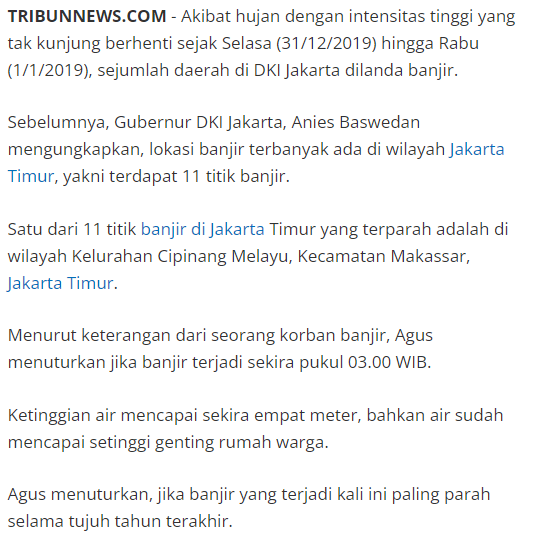